# Chapter 4: CNN
## Ex1: Digits MNIST
* Cho dữ liệu mnist chứa 70.000 hình ảnh là các số từ 0-9.
* Chia dữ liệu thành 2 bộ là train (60.000 hình) và test (10.000 hình ảnh)
* Áp dụng CNN để nhận biết hình ảnh số là số mấy.
* Tính toán số lượng các tham số từ summary của mô hình.
* Chú ý: nên dùng EarlyStopping, ModelCheckpoint để lưu lại model sau các lần thực thi để tránh khi bị ngắt đột ngột phải thực hiện lại từ đầu

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
%cd /content/drive/My\ Drive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_3/Chapter4

/content/drive/My Drive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_3/Chapter4


In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model, to_categorical
from IPython.display import Image
from tensorflow.keras.models import load_model

In [39]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [40]:
X_train.shape

(60000, 28, 28)

5


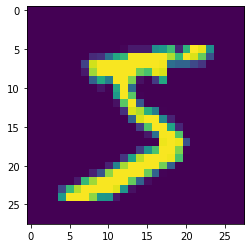

In [41]:
plt.imshow(X_train[0])
print(y_train[0])

In [42]:
y_train.shape

(60000,)

In [43]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [44]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [52]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [53]:
# create model
model = Sequential()
# add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Tao va du doan tiep tuc voi ANN
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
# output
model.add(Dense(10, activation = 'softmax'))

In [56]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [57]:
callbacks = [EarlyStopping(monitor='val_loss',patience=10),
             ModelCheckpoint('model_mnist_checkpoint_new.h5',save_best_only=True)]

In [58]:
model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=256,
          callbacks = callbacks)

Epoch 1/100
235/235 [==============================] - 148s 627ms/step - loss: 1.7178 - accuracy: 0.7739 - val_loss: 0.1004 - val_accuracy: 0.9682
Epoch 2/100
235/235 [==============================] - 131s 557ms/step - loss: 0.1845 - accuracy: 0.9459 - val_loss: 0.0566 - val_accuracy: 0.9820
Epoch 3/100
235/235 [==============================] - 131s 557ms/step - loss: 0.1269 - accuracy: 0.9628 - val_loss: 0.0438 - val_accuracy: 0.9856
Epoch 4/100
235/235 [==============================] - 130s 552ms/step - loss: 0.0986 - accuracy: 0.9707 - val_loss: 0.0374 - val_accuracy: 0.9868
Epoch 5/100
235/235 [==============================] - 129s 549ms/step - loss: 0.0851 - accuracy: 0.9744 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 6/100
235/235 [==============================] - 130s 552ms/step - loss: 0.0757 - accuracy: 0.9777 - val_loss: 0.0349 - val_accuracy: 0.9893
Epoch 7/100
235/235 [==============================] - 129s 549ms/step - loss: 0.0678 - accuracy: 0.9796 - val_loss: 0

In [61]:
# Crates a HDF5 file
model.save('my_mnist_model_CNN_new.h5')
print('Save!!!')

Save!!!


In [59]:
# show predictions for the first 5 images in the test set
result = model.predict(X_test[:5])

In [ ]:
result

In [ ]:
result.round()

In [60]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
plt.imshow(test_images[0])